In [ ]:
# Analysing Hospital Billing with Process Mining

In [2]:
# Installation of PM4Py Python package
#Source: https://pm4py.fit.fraunhofer.de/install-page
!pip install pm4py

### Make sure you have GraphViz installed in your system ###
# brew install graphviz # on macOS
# For other systems check link below:
# https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

     |████████████████████████████████| 1.4 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 278 kB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 40.6 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 25.9 MB/s eta 0:00:01
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26103 sha256=287452256aa1a99245d5112b3eec96b81cbd3930499923a9d5a0ec45db579a0a
  Stored in directory: /Users/Sami/Library/Caches/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=62c2bb005730c29b3aec775921941ea9dd81f8b440341638dd0f98f502228956
  Stored in directory: /Users/Sami/Library/Caches/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-macosx_10_9_x86_64.whl size=8279 sha256=854aeb95e15673c03ebbd492a75ce9ad2f9aa8fda6ab165c679

In [1]:
### Only run this is you are using this in Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
# Import dependencies and set the filepath
import pm4py
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.express as px         # needed for plotly express in general
#import plotly.graph_objects as go   # needed for plotly graph objects e.g. pie

In [18]:
# Set the file path and project settings
# Please upload the local file sent via email to colab before running this
PROJ_ROOT = os.path.abspath(os.path.pardir)
file_path = '../data/Hospital Billing - Event Log.xes' # if using the original file
#file_path = '/content/log.xes' # if renamed
figures_dir = os.path.join(PROJ_ROOT, 'figures')

assert os.path.exists(file_path)

In [22]:
# Read the XES file and create the log
#event_log = pm4py.read_xes(file_path)

from pm4py.objects.log.importer.xes import importer as xes_importer
event_log = xes_importer.apply(file_path)

In [24]:
# Print headers
print(event_log[0]) #prints the first trace of the log
print(event_log[0][0]) #prints the first event of the first trace

{'attributes': {'concept:name': 'A'}, 'events': [{'isCancelled': False, 'diagnosis': 'A', 'time:timestamp': datetime.datetime(2012, 12, 16, 19, 33, 10, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'caseType': 'A', 'speciality': 'A', 'org:resource': 'ResA', 'concept:name': 'NEW', 'blocked': False, 'isClosed': True, 'flagD': True, 'flagB': False, 'flagA': False, 'state': 'In progress', 'lifecycle:transition': 'complete'}, '..', {'org:resource': 'ResB', 'state': 'Billed', 'concept:name': 'BILLED', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2013, 12, 19, 3, 44, 31, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}]}
{'isCancelled': False, 'diagnosis': 'A', 'time:timestamp': datetime.datetime(2012, 12, 16, 19, 33, 10, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'caseType': 'A', 'speciality': 'A', 'org:resource': 'ResA', 'concept:name': 'NEW', 'blocked': False, 'isClosed': True, 'flagD': True, 'flagB': False, 'flagA': F

In [25]:
#event_log.head() # this doesn't work, and not needed

AttributeError: 'EventLog' object has no attribute 'head'

In [15]:
#def import_xes(file_path):
#  event_log = pm4py.read_xes(file_path)
#  start_activities = pm4py.get_start_activities(event_log)
#  end_activities = pm4py.get_end_activities(event_log)
#print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

In [26]:
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)

print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'NEW': 100000}
End activities: {'BILLED': 63498, 'DELETE': 8215, 'NEW': 22407, 'FIN': 3611, 'SET STATUS': 600, 'CODE OK': 948, 'MANUAL': 85, 'JOIN-PAT': 47, 'CHANGE DIAGN': 19, 'RELEASE': 107, 'CODE NOK': 14, 'EMPTY': 444, 'REJECT': 4, 'STORNO': 1}


In [38]:
### Generate petri net

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petrinet import visualizer as pn_visualizer

#net, initial_marking, final_marking = inductive_miner.apply(event_log, parameters=param_keys)
net, initial_marking, final_marking = inductive_miner.apply(event_log)

net_graph = pn_visualizer.apply(net, initial_marking=initial_marking, final_marking=final_marking, 
                            log=event_log)

# fix places size in the graph
body = np.array(net_graph.body)
body[body ==  '\tnode [fixedsize=true shape=circle width=0.75]'] = '\tnode [fixedsize=true shape=circle width=1]'
net_graph.body = body

net_graph.render(os.path.join(figures_dir, 'petrinet'), format='pdf', view=True)

/Users/Sami/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  


'/Users/Sami/github/hosp-billing-PM4py/figures/petrinet.pdf'

In [39]:
### Generate the process tree

from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(event_log)

tree_graph = pt_visualizer.apply(tree)

# fix operations size in the graph
tree_graph.body = list(map(lambda r:r.replace('width=0.6', 'width=1'),
                           tree_graph.body))

tree_graph.render(os.path.join(figures_dir, 'tree'),
                 format='pdf',
                 view=True)

'/Users/Sami/github/hosp-billing-PM4py/figures/tree.pdf'

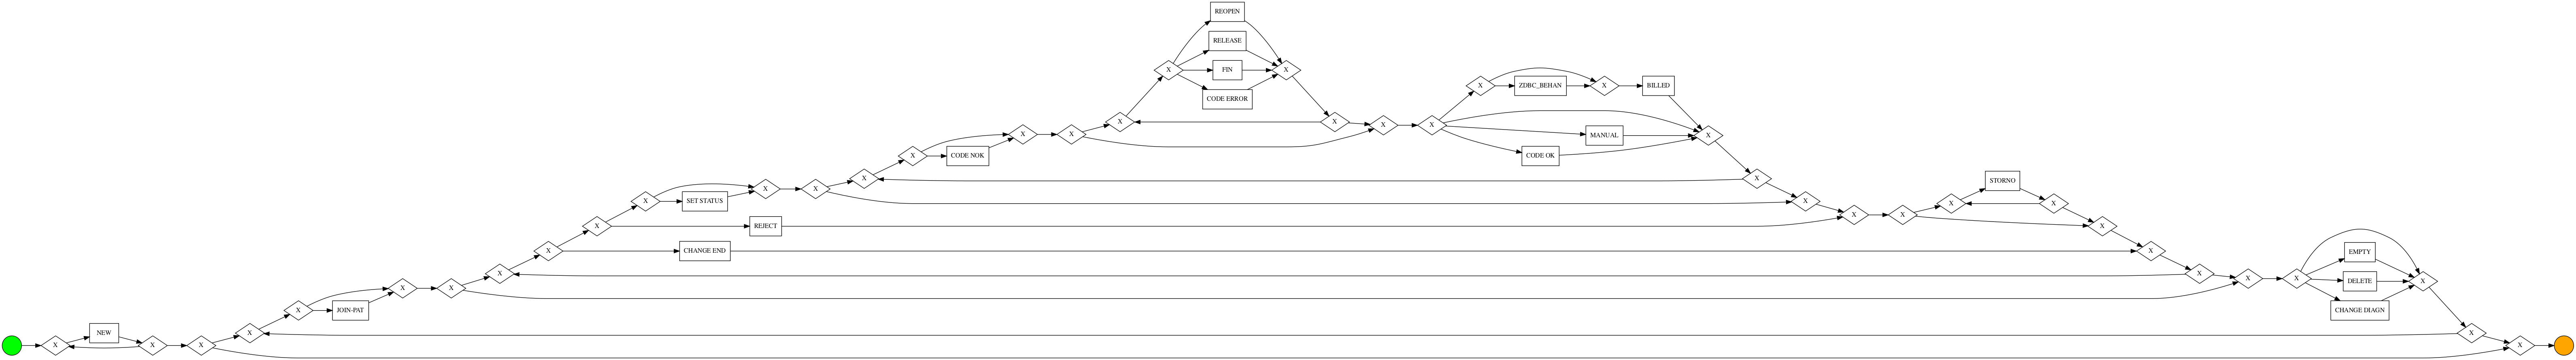

In [46]:
# Obtaining a Process Model
# event_log = pm4py.read_xes('C:/Users/demo/Downloads/running-example.xes')

process_tree = pm4py.discover_process_tree_inductive(event_log) # discover_tree_inductive is deprecated
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

### PDF creation is not working right now. Generate the above and save the image that is shown here below in cell output.
#model_graph = pt_visualizer.apply(bpmn_model)

# fix operations size in the graph
#model_graph.body = list(map(lambda r:r.replace('width=0.6', 'width=1'),
#                           tree_graph.body))
#model_graph.render(os.path.join(figures_dir, 'process-model'),
#                 format='pdf',
#                 view=True)

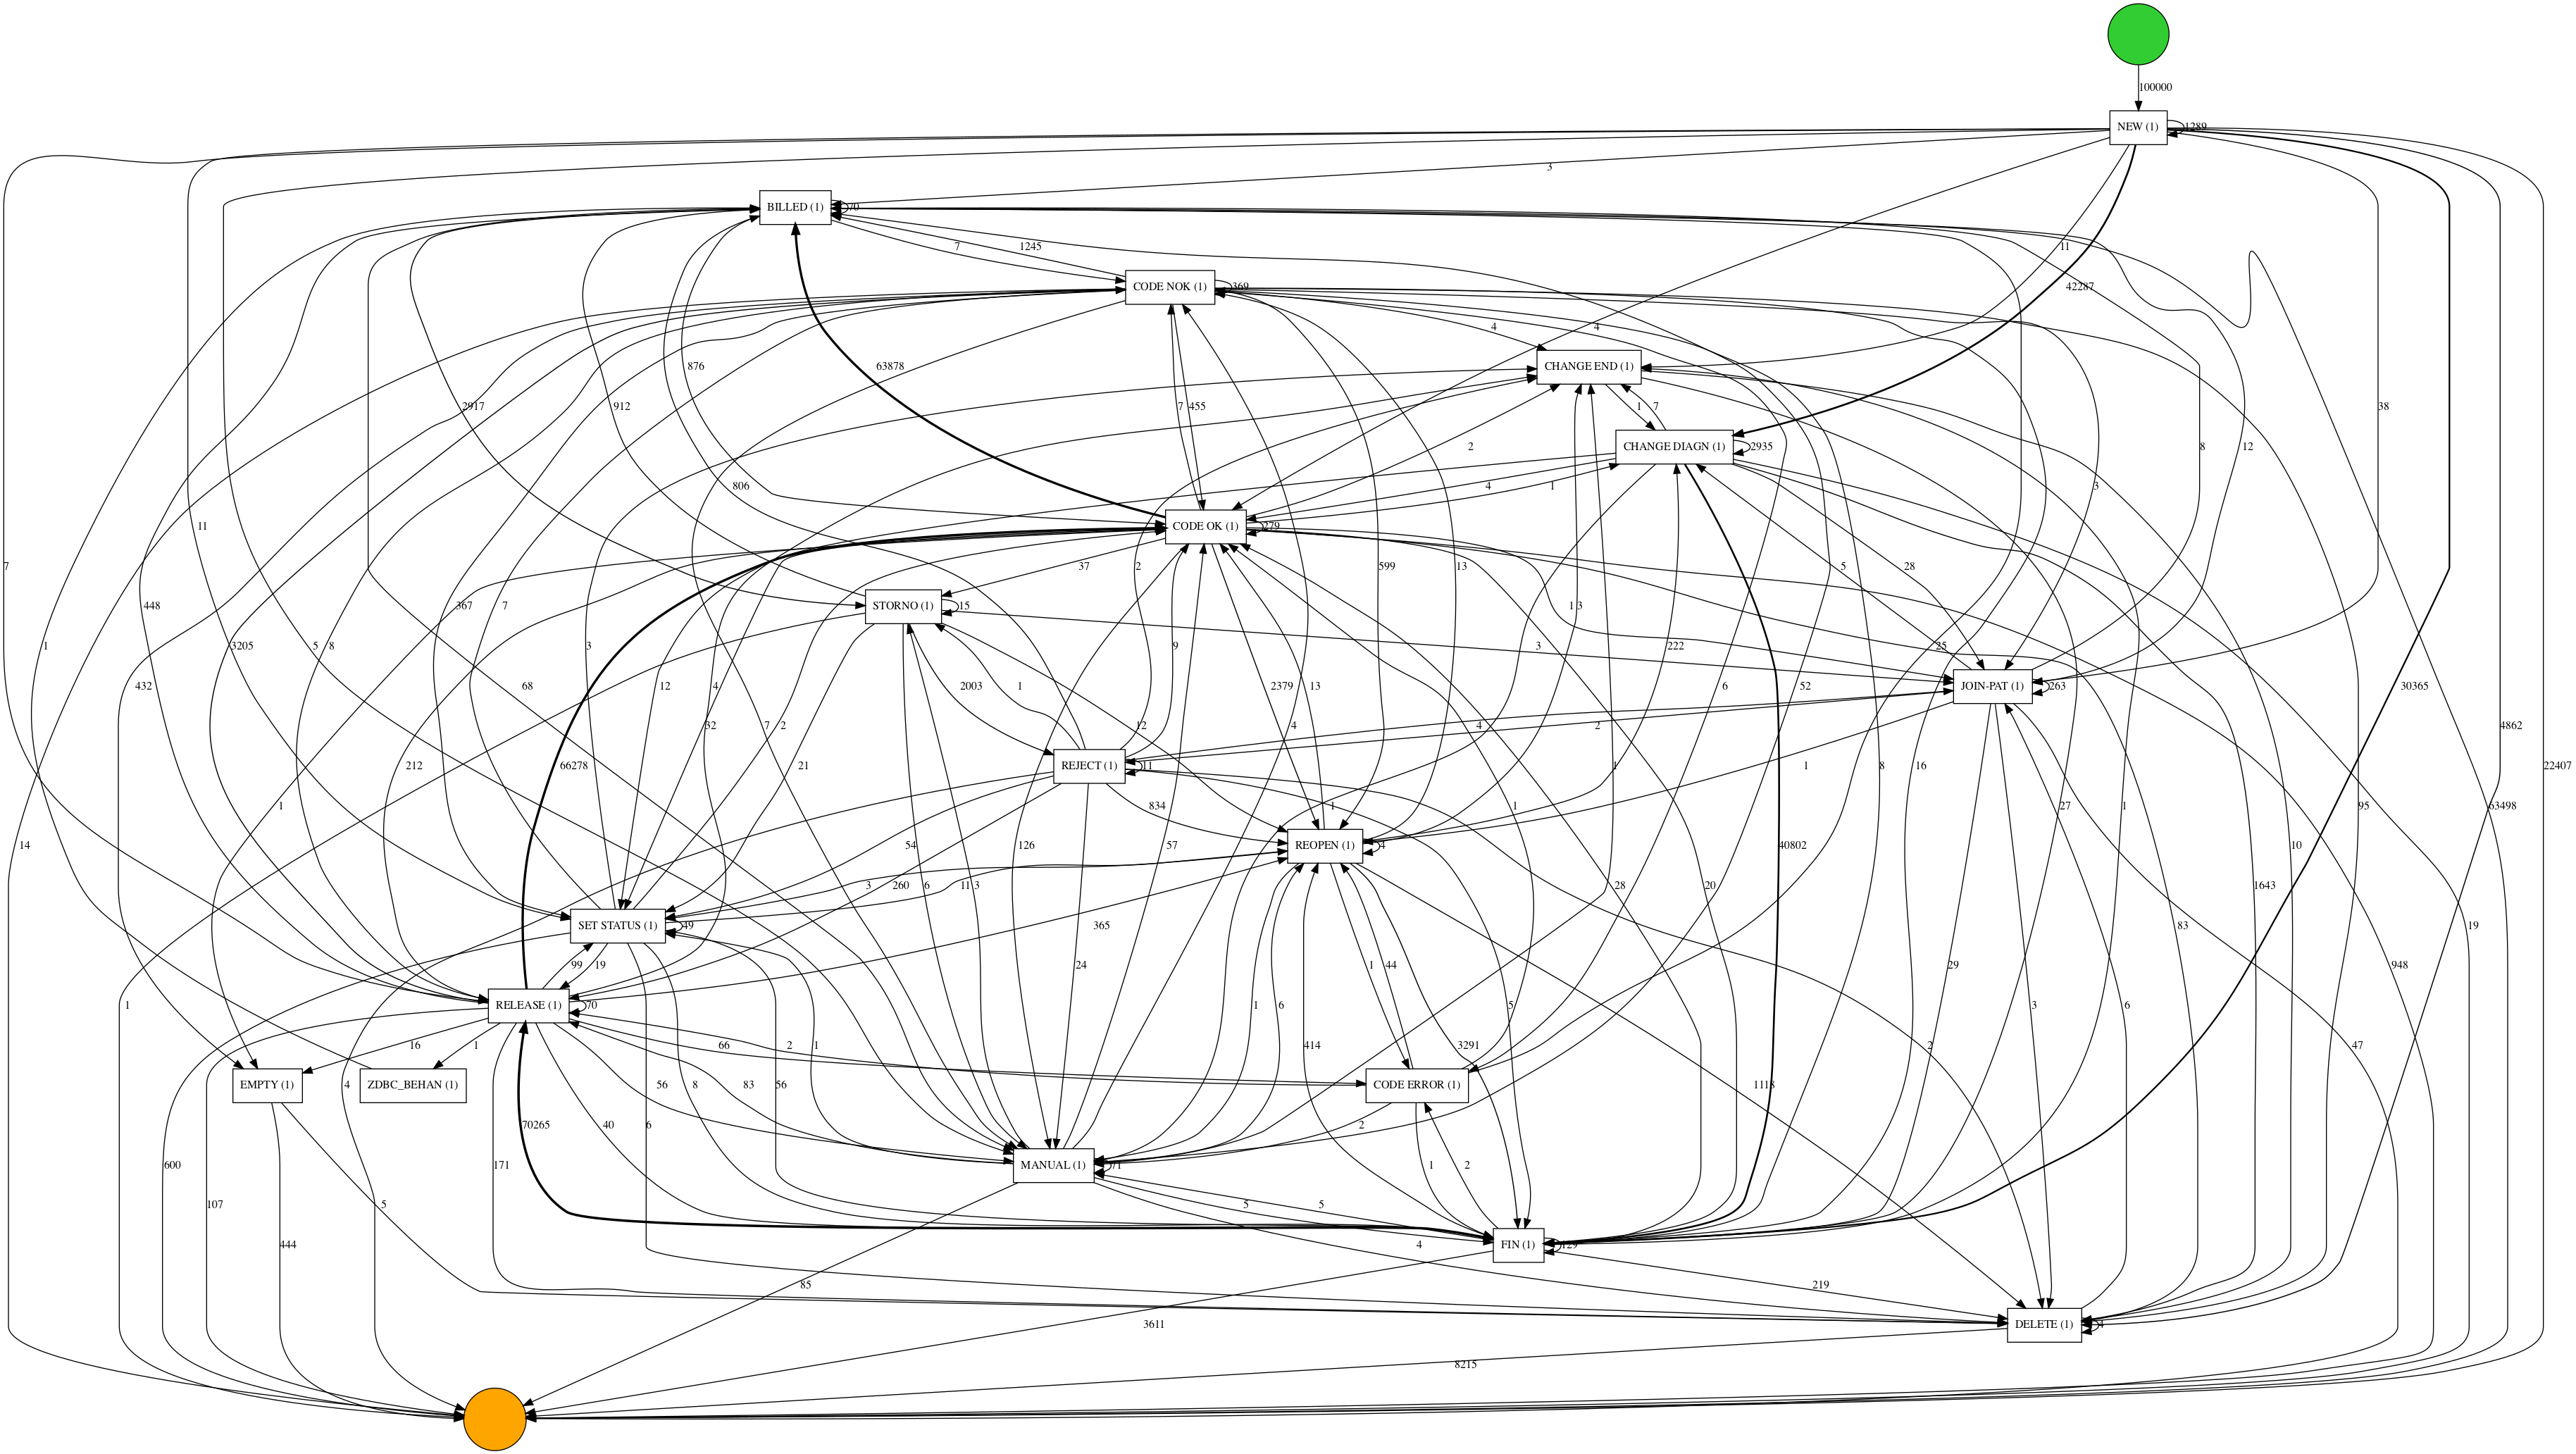

In [47]:
#obtain process map 
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

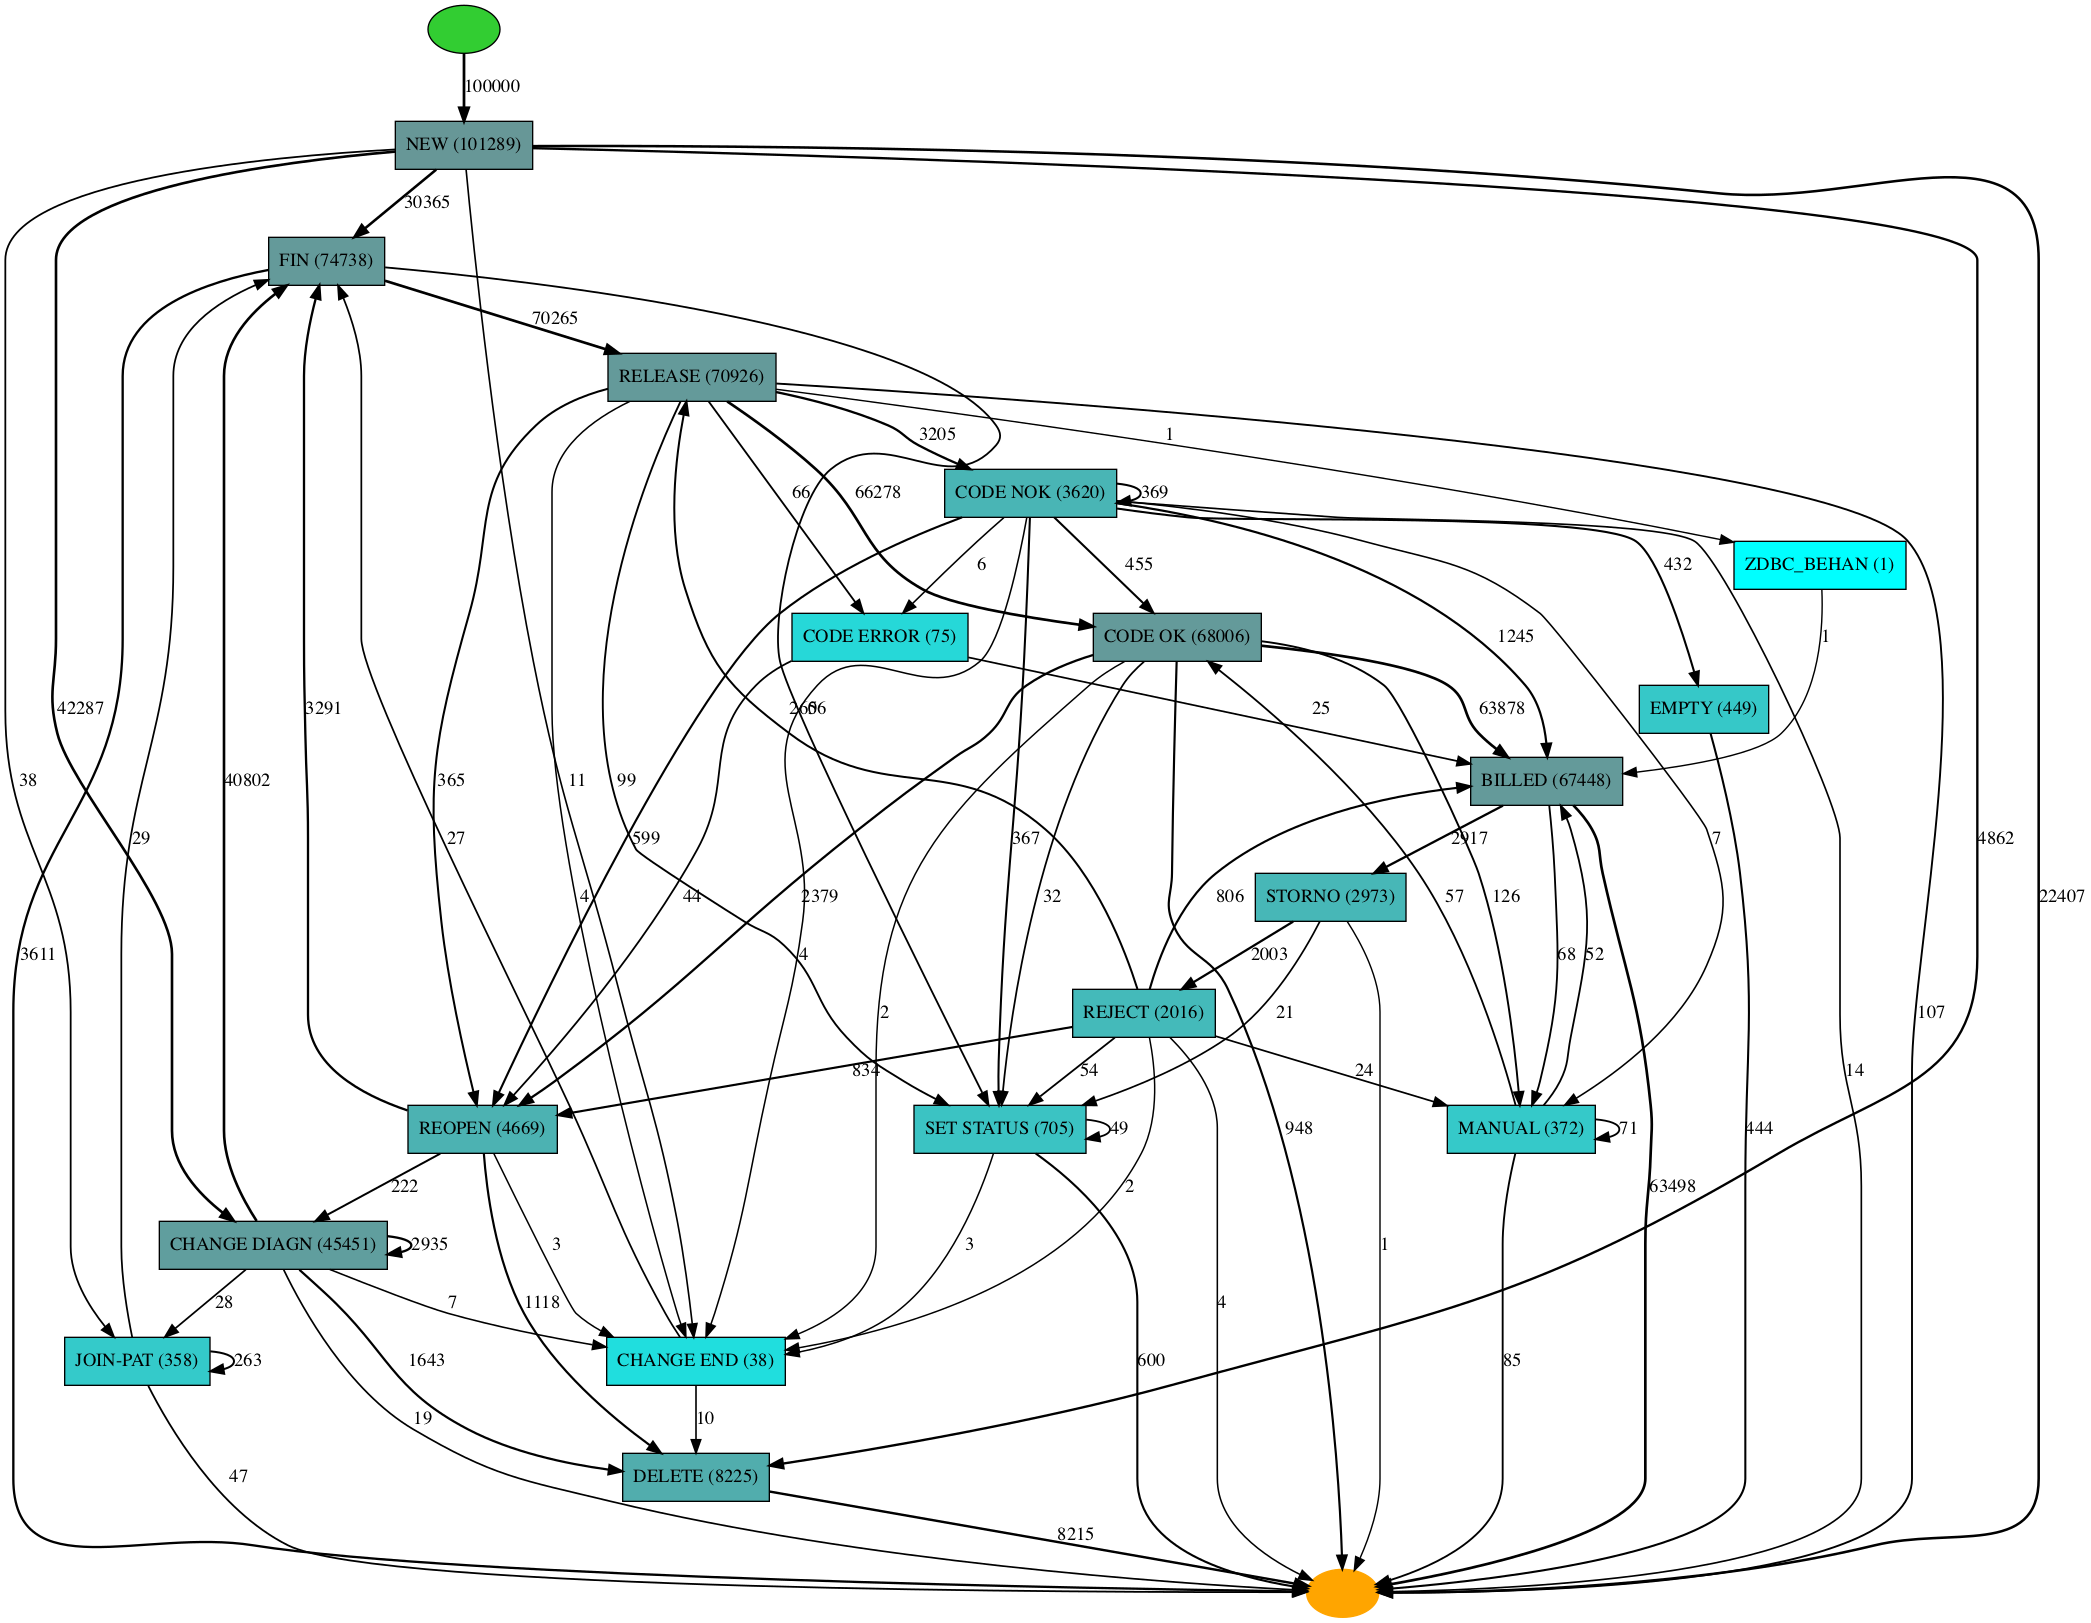

In [48]:
#heuristics map
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

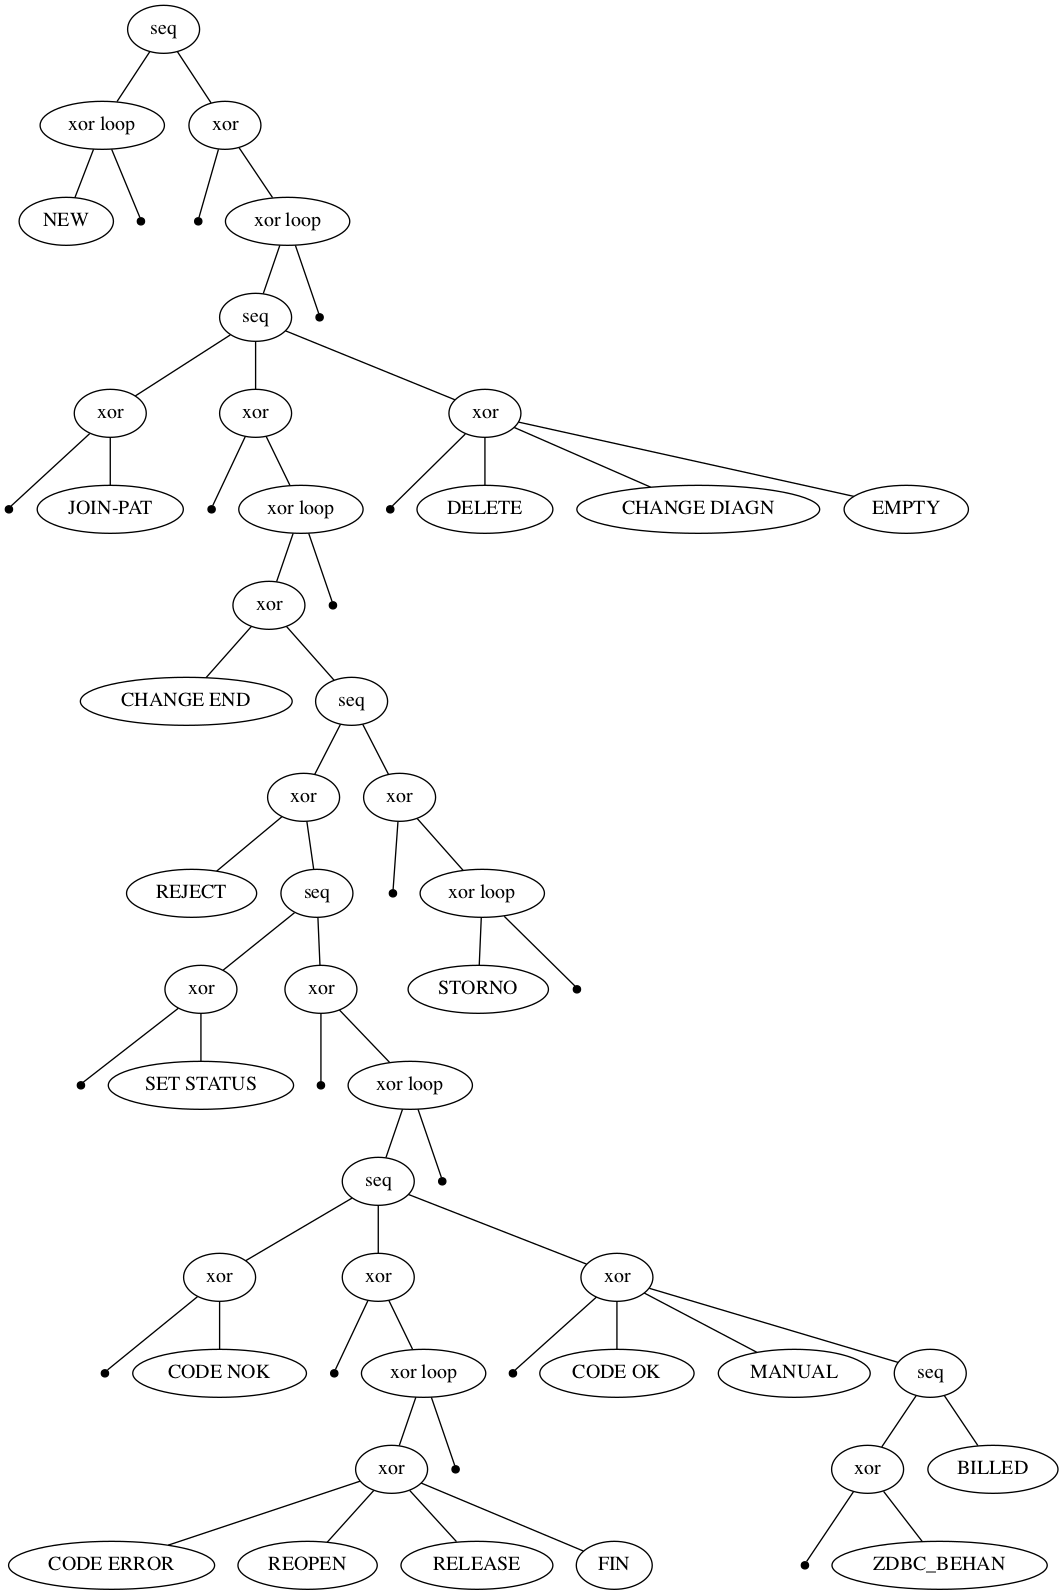

In [49]:
# View Process Tree
process_tree = pm4py.discover_process_tree_inductive(event_log) # discover_tree_inductive is deprecated
pm4py.view_process_tree(process_tree)

In [50]:
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'NEW': 100000}
End activities: {'BILLED': 63498, 'DELETE': 8215, 'NEW': 22407, 'FIN': 3611, 'SET STATUS': 600, 'CODE OK': 948, 'MANUAL': 85, 'JOIN-PAT': 47, 'CHANGE DIAGN': 19, 'RELEASE': 107, 'CODE NOK': 14, 'EMPTY': 444, 'REJECT': 4, 'STORNO': 1}


## Miner Algorithms
Please refer to the documentation here:
https://pm4py.fit.fraunhofer.de/documentation#item-3-1

In [ ]:
# Alpha Miner implementation

from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(event_log)

# Inductive Miner implementation
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
net, initial_marking, final_marking = inductive_miner.apply(event_log)

## Visualisations

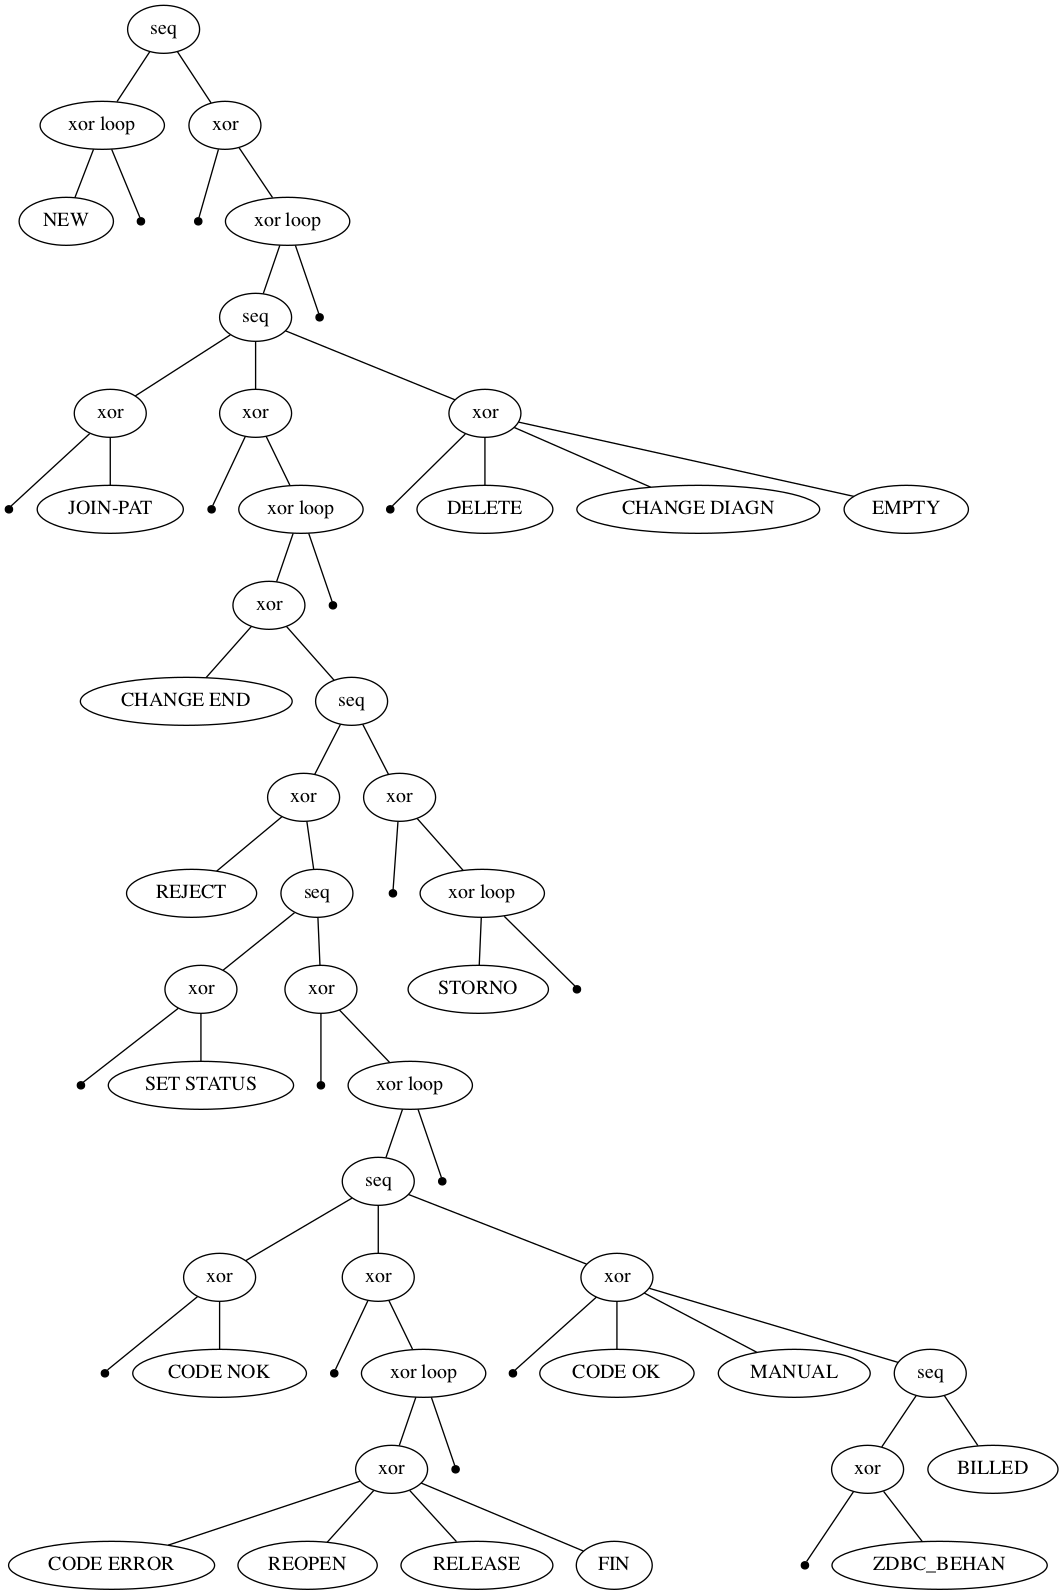

In [51]:
# Visualisation of IM

from pm4py.visualization.process_tree import visualizer as pt_visualizer
tree = inductive_miner.apply_tree(event_log)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

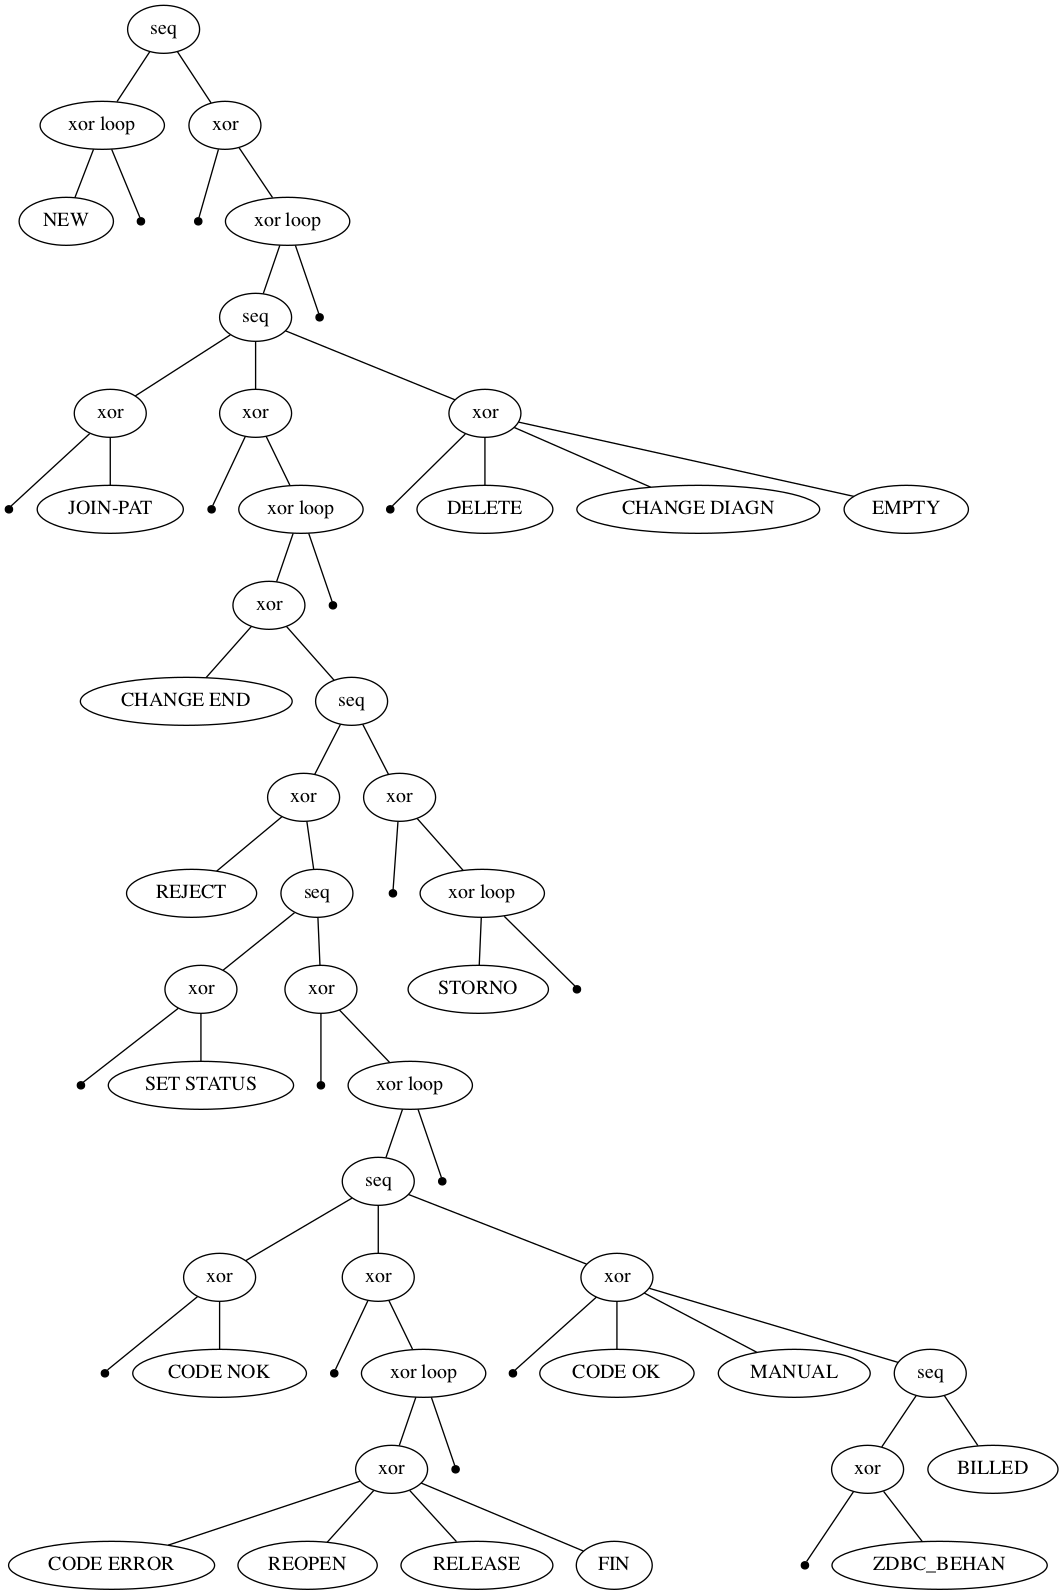

In [52]:
# Converting process tree in petri net

from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

In [57]:
# Dotted chart
#pm4py.view_dotted_chart(event_log, format="svg") #ValueError: Cannot embed the 'svg' image format